# Programa Nanodegree Data Science for Business

## by Rafael Tomaz, Identify Fraud from Enron Email

Em 2000, Enron era uma das maiores empresas dos Estados Unidos. Já em 2002, ela colapsou e quebrou devido a uma fraude que envolveu grande parte da corporação. Resultando em uma investigação federal, muitos dados que são normalmente confidenciais, se tornaram públicos, incluindo dezenas de milhares de e-mails e detalhes financeiros para os executivos dos mais altos níveis da empresa. Neste projeto, você irá bancar o detetive, e colocar suas habilidades na construção de um modelo preditivo que visará determinar se um funcionário é ou não um funcionário de interesse (POI). Um funcionário de interesse é um funcionário que participou do escândalo da empresa Enron. Para te auxiliar neste trabalho de detetive, nós combinamos os dados financeiros e sobre e-mails dos funcionários investigados neste caso de fraude, o que significa que eles foram indiciados, fecharam acordos com o governo, ou testemunharam em troca de imunidade no processo.

In [1]:
import sys
import pickle

from feature_format import featureFormat, targetFeatureSplit
from sklearn.feature_selection import SelectKBest
from tester import dump_classifier_and_data,test_classifier

from sklearn.cross_validation import StratifiedShuffleSplit

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

H:\MBA\Python\Anaconda3\envs\py27-2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Main Variables

In [2]:
# todos em dolares americanos (USD)
all_features_finacial_payments = ['salary', 
'bonus', 
'long_term_incentive', 
'deferred_income', 
'deferral_payments', 
'loan_advances', 
'other', 
'expenses',
'director_fees',
'total_payments'] 

all_features_finacial_stocks = ['exercised_stock_options',
 'restricted_stock', 
 'restricted_stock_deferred', 
 'total_stock_value']

# as unidades aqui sao geralmente em numero de emails; a excecao notavel aqui e o atributo email_address, que e uma string
all_features_email = ['to_messages', 
'from_poi_to_this_person', 
'from_messages', 
'from_this_person_to_poi',
'shared_receipt_with_poi']

email_address = 'email_address'

# atributo objetivo logico (booleano), representado como um inteiro
target_label = 'poi'

# lista de chaves para serem removidas durante a analise
pessoas_para_serem_removidas = set()

# Candidatos a POIS
pois_candidates = set()

## Main Functions

In [3]:
def normalize_value_to_numpy_nan(value):
    if value is None or value == 'NaN':
        value = np.nan
    return value

def explore_data():
    pass

def print_index_df(df):
    for x in df.index:
        print x
        
def get_array_string_df(df):
    str_indext_list = []
    for x in df.index:
        str_indext_list.append(str(x))
    return str_indext_list

def remove_outliers_df(df, set_key):
    return df.drop(axis=0, labels=set_key)


def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

In [4]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = [target_label] + all_features_finacial_payments + all_features_finacial_stocks + all_features_email # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Exploração de Dados

In [5]:
print "####################################################"
print "###    Entendimento dos Dados e das Perguntas    ###"
print "####################################################"

print "Convertendo o dicionario dos dados para pandas para iniciar as analises de dados e ajustar os dados"
df = pd.DataFrame.from_dict(data_dict,orient='index')

####################################################
###    Entendimento dos Dados e das Perguntas    ###
####################################################
Convertendo o dicionario dos dados para pandas para iniciar as analises de dados e ajustar os dados


In [6]:
print "Amostra inicial dos dados com Head e Tail, para 5 primeiros dados e ultimos 5 dados"
df.head(5)

Amostra inicial dos dados com Head e Tail, para 5 primeiros dados e ultimos 5 dados


,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [7]:
df.tail(5)

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
WINOKUR JR. HERBERT S,NaN,NaN,NaN,84992,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,108579,-25000,NaN,NaN,NaN
WODRASKA JOHN,NaN,NaN,NaN,189583,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,189583,NaN,False,NaN,NaN,NaN,john.wodraska@enron.com,NaN
WROBEL BRUCE,NaN,NaN,NaN,NaN,139130,NaN,NaN,NaN,NaN,139130,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
YEAGER F SCOTT,158403,NaN,NaN,360300,8308552,NaN,3576206,NaN,NaN,11884758,...,NaN,NaN,147950,NaN,True,NaN,NaN,NaN,scott.yeager@enron.com,NaN
YEAP SOON,NaN,NaN,NaN,55097,192758,NaN,NaN,NaN,NaN,192758,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


In [8]:
print "Modificando campos None, caso string 'nan' para numpy.nan"

df = df.applymap(lambda x: normalize_value_to_numpy_nan(x))
df.describe()

Modificando campos None, caso string 'nan' para numpy.nan


,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
count,9.500000e+01,86.000000,3.900000e+01,1.250000e+02,1.020000e+02,8.200000e+01,1.100000e+02,86.000000,1.800000e+01,1.260000e+02,9.500000e+01,4.000000e+00,86.000000,9.300000e+01,86.000000,1.700000e+01,4.900000e+01,6.600000e+01,86.000000
mean,5.621943e+05,2073.860465,1.642674e+06,5.081526e+06,5.987054e+06,2.374235e+06,2.321741e+06,1176.465116,1.664106e+05,6.773957e+06,1.087289e+05,4.196250e+07,608.790698,9.190650e+05,41.232558,1.668049e+05,-1.140475e+06,1.470361e+06,64.895349
std,2.716369e+06,2582.700981,5.161930e+06,2.906172e+07,3.106201e+07,1.071333e+07,1.251828e+07,1178.317641,4.201494e+06,3.895777e+07,5.335348e+05,4.708321e+07,1841.033949,4.589253e+06,100.073111,3.198914e+05,4.025406e+06,5.942759e+06,86.979244
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,3.285000e+03,7.000000e+04,-2.604490e+06,2.000000,-7.576788e+06,-4.409300e+04,1.480000e+02,4.000000e+05,12.000000,2.000000e+00,0.000000,3.285000e+03,-2.799289e+07,6.922300e+04,0.000000
25%,2.118160e+05,541.250000,8.157300e+04,3.944750e+05,5.278862e+05,4.312500e+05,2.540180e+05,249.750000,-3.896218e+05,4.945102e+05,2.261400e+04,1.600000e+06,22.750000,1.215000e+03,1.000000,9.878400e+04,-6.948620e+05,2.812500e+05,10.000000
50%,2.599960e+05,1211.000000,2.274490e+05,1.101393e+06,1.310814e+06,7.693750e+05,4.517400e+05,740.500000,-1.469750e+05,1.102872e+06,4.695000e+04,4.176250e+07,41.000000,5.238200e+04,8.000000,1.085790e+05,-1.597920e+05,4.420350e+05,35.000000
75%,3.121170e+05,2634.750000,1.002672e+06,2.093263e+06,2.547724e+06,1.200000e+06,1.002370e+06,1888.250000,-7.500975e+04,2.949847e+06,7.995250e+04,8.212500e+07,145.500000,3.620960e+05,24.750000,1.137840e+05,-3.834600e+04,9.386720e+05,72.250000
max,2.670423e+07,15149.000000,3.208340e+07,3.098866e+08,3.117640e+08,9.734362e+07,1.303223e+08,5521.000000,1.545629e+07,4.345095e+08,5.235198e+06,8.392500e+07,14368.000000,4.266759e+07,609.000000,1.398517e+06,-8.330000e+02,4.852193e+07,528.000000


In [9]:
print "Análise dos dados"

is_poi = df[target_label] == True
pois_count = df['poi'].value_counts()
total_items = df.shape[0]

print
print "Existem %d data points (pessoas) no dataset" % total_items
print "Nomes dos usuarios:"

Análise dos dados

Existem 146 data points (pessoas) no dataset
Nomes dos usuarios:


In [10]:
print_index_df(df)

ALLEN PHILLIP K
BADUM JAMES P
BANNANTINE JAMES M
BAXTER JOHN C
BAY FRANKLIN R
BAZELIDES PHILIP J
BECK SALLY W
BELDEN TIMOTHY N
BELFER ROBERT
BERBERIAN DAVID
BERGSIEKER RICHARD P
BHATNAGAR SANJAY
BIBI PHILIPPE A
BLACHMAN JEREMY M
BLAKE JR. NORMAN P
BOWEN JR RAYMOND M
BROWN MICHAEL
BUCHANAN HAROLD G
BUTTS ROBERT H
BUY RICHARD B
CALGER CHRISTOPHER F
CARTER REBECCA C
CAUSEY RICHARD A
CHAN RONNIE
CHRISTODOULOU DIOMEDES
CLINE KENNETH W
COLWELL WESLEY
CORDES WILLIAM R
COX DAVID
CUMBERLAND MICHAEL S
DEFFNER JOSEPH M
DELAINEY DAVID W
DERRICK JR. JAMES V
DETMERING TIMOTHY J
DIETRICH JANET R
DIMICHELE RICHARD G
DODSON KEITH
DONAHUE JR JEFFREY M
DUNCAN JOHN H
DURAN WILLIAM D
ECHOLS JOHN B
ELLIOTT STEVEN
FALLON JAMES B
FASTOW ANDREW S
FITZGERALD JAY L
FOWLER PEGGY
FOY JOE
FREVERT MARK A
FUGH JOHN L
GAHN ROBERT S
GARLAND C KEVIN
GATHMANN WILLIAM D
GIBBS DANA R
GILLIS JOHN
GLISAN JR BEN F
GOLD JOSEPH
GRAMM WENDY L
GRAY RODNEY
HAEDICKE MARK E
HANNON KEVIN P
HAUG DAVID L
HAYES ROBERT E
HAYSLETT RODERIC

In [11]:
print "No dataset possuem %d (%2.f Porcento) POIs e %d (%2.f Porcento)non-POIs" % (pois_count[1],(pois_count[1] * 1. / total_items) * 100., pois_count[0], (pois_count[0] * 1. / total_items) * 100.)
print "Possui %d características disponíveis, 14 atributos financeiros, 6 atributos de email e 1 atributo de rótulo, além de uma chave que é o nome do POI" % df.shape[1]

No dataset possuem 18 (12 Porcento) POIs e 128 (88 Porcento)non-POIs
Possui 21 características disponíveis, 14 atributos financeiros, 6 atributos de email e 1 atributo de rótulo, além de uma chave que é o nome do POI


In [12]:
print "Existem características com muitos valores faltando, Nulos ('NaN')"

missing_values_by_columns = df.shape[0]-df.count()
missing_values_by_columns.sort_values(axis=0, ascending=False, inplace=True)
missing_values_by_columns

Existem características com muitos valores faltando, Nulos ('NaN')


loan_advances                142
director_fees                129
restricted_stock_deferred    128
deferral_payments            107
deferred_income               97
long_term_incentive           80
bonus                         64
from_poi_to_this_person       60
shared_receipt_with_poi       60
to_messages                   60
from_this_person_to_poi       60
from_messages                 60
other                         53
expenses                      51
salary                        51
exercised_stock_options       44
restricted_stock              36
email_address                 35
total_payments                21
total_stock_value             20
poi                            0
dtype: int64

In [13]:
total_celulas_preenchidas = sum(df.count())
total_celulas_faltantes = sum(missing_values_by_columns)   
total_celulas = total_celulas_preenchidas + total_celulas_faltantes
print "Existem %d ceculas no total, porem %d celulas estao preenchidas e %d celulas estao vazias, no total de %.2f (Porcento)" % (total_celulas, total_celulas_preenchidas, total_celulas_faltantes, (total_celulas_faltantes * 1. / total_celulas) * 100)

Existem 3066 ceculas no total, porem 1708 celulas estao preenchidas e 1358 celulas estao vazias, no total de 44.29 (Porcento)


In [14]:
print "Valores acima em percentual:"
missing_values_by_columns = ((1-df.count()/df.shape[0])*100).apply(lambda x: str('%.f' % x) + '%')
missing_values_by_columns.sort_values(axis=0, ascending=False, inplace=True)
missing_values_by_columns

Valores acima em percentual:


loan_advances                97%
director_fees                88%
restricted_stock_deferred    88%
deferral_payments            73%
deferred_income              66%
long_term_incentive          55%
bonus                        44%
from_poi_to_this_person      41%
shared_receipt_with_poi      41%
to_messages                  41%
from_this_person_to_poi      41%
from_messages                41%
other                        36%
expenses                     35%
salary                       35%
exercised_stock_options      30%
restricted_stock             25%
email_address                24%
total_stock_value            14%
total_payments               14%
poi                           0%
dtype: object

In [15]:
print "Count para variaveis de POIs"
pois_count

Count para variaveis de POIs


False    128
True      18
Name: poi, dtype: int64

In [16]:
df[is_poi].count()

salary                       17
to_messages                  14
deferral_payments             5
total_payments               18
exercised_stock_options      12
bonus                        16
restricted_stock             17
shared_receipt_with_poi      14
restricted_stock_deferred     0
total_stock_value            18
expenses                     18
loan_advances                 1
from_messages                14
other                        18
from_this_person_to_poi      14
poi                          18
director_fees                 0
deferred_income              11
long_term_incentive          12
email_address                18
from_poi_to_this_person      14
dtype: int64

In [17]:
print "Os nomes dos POIS são:"
print
print_index_df(df[is_poi])

Os nomes dos POIS são:

BELDEN TIMOTHY N
BOWEN JR RAYMOND M
CALGER CHRISTOPHER F
CAUSEY RICHARD A
COLWELL WESLEY
DELAINEY DAVID W
FASTOW ANDREW S
GLISAN JR BEN F
HANNON KEVIN P
HIRKO JOSEPH
KOENIG MARK E
KOPPER MICHAEL J
LAY KENNETH L
RICE KENNETH D
RIEKER PAULA H
SHELBY REX
SKILLING JEFFREY K
YEAGER F SCOTT


In [18]:
print "POIs que não possuem email de / Para:"
print
pois_var = df[df['to_messages'].isnull() & df['from_messages'].isnull() & is_poi]
print_index_df(pois_var)

POIs que não possuem email de / Para:

FASTOW ANDREW S
HIRKO JOSEPH
KOPPER MICHAEL J
YEAGER F SCOTT


In [19]:
user_without_financial_information = df[
    df['salary'].isnull() & 
    df['deferral_payments'].isnull() & 
    df['total_payments'].isnull() &
    df['loan_advances'].isnull() & 
    df['bonus'].isnull() & 
    df['restricted_stock_deferred'].isnull() &
    df['deferred_income'].isnull() & 
    df['total_stock_value'].isnull() &
    df['expenses'].isnull() & 
    df['exercised_stock_options'].isnull() & 
    df['other'].isnull() & 
    df['long_term_incentive'].isnull() &
    df['restricted_stock'].isnull() &
    df['director_fees'].isnull()
]

print"Usuarios que nao possuem dados financeiros, portanto podem ser removidos"
print_index_df(user_without_financial_information)

Usuarios que nao possuem dados financeiros, portanto podem ser removidos
LOCKHART EUGENE E


In [20]:
print "Com base nos dados acima por se tratar de ser apenas de uma empresa de viagem prestadora de servico e nao ter valor expressivo e nao ser um POI podera ser removido do dataset"
print "Analisando o PDF incluído no trabalho no Footnotes indice (e) 'Payments were made by Enron employees on account of business-related travel to The Travel Agency in the Park (later Alliance Worldwide), which was co- owned by the sister of Enron's former Chairman. Payments made by the Debtor to reimburse employees for these expenses have not been included.'"
print "Portanto pode-se ser removido da analise"
travel_agency = 'THE TRAVEL AGENCY IN THE PARK'
df.loc[travel_agency]

Com base nos dados acima por se tratar de ser apenas de uma empresa de viagem prestadora de servico e nao ter valor expressivo e nao ser um POI podera ser removido do dataset
Analisando o PDF incluído no trabalho no Footnotes indice (e) 'Payments were made by Enron employees on account of business-related travel to The Travel Agency in the Park (later Alliance Worldwide), which was co- owned by the sister of Enron's former Chairman. Payments made by the Debtor to reimburse employees for these expenses have not been included.'
Portanto pode-se ser removido da analise


salary                          NaN
to_messages                     NaN
deferral_payments               NaN
total_payments               362096
exercised_stock_options         NaN
bonus                           NaN
restricted_stock                NaN
shared_receipt_with_poi         NaN
restricted_stock_deferred       NaN
total_stock_value               NaN
expenses                        NaN
loan_advances                   NaN
from_messages                   NaN
other                        362096
from_this_person_to_poi         NaN
poi                           False
director_fees                   NaN
deferred_income                 NaN
long_term_incentive             NaN
email_address                   NaN
from_poi_to_this_person         NaN
Name: THE TRAVEL AGENCY IN THE PARK, dtype: object

In [21]:
pessoas_para_serem_removidas.update(get_array_string_df(user_without_financial_information))
pessoas_para_serem_removidas.add(travel_agency)
pessoas_para_serem_removidas

{'LOCKHART EUGENE E', 'THE TRAVEL AGENCY IN THE PARK'}

In [22]:
print "Pessoas que nao possuem total de pagamentos e total de stock value"
user_without_financial_total_payments_and_total_stock_values_information = df[
    df['total_payments'].isnull() &
    df['total_stock_value'].isnull()
]
print_index_df(user_without_financial_total_payments_and_total_stock_values_information)

Pessoas que nao possuem total de pagamentos e total de stock value
CHAN RONNIE
LOCKHART EUGENE E
POWERS WILLIAM


In [23]:
user_without_financial_total_payments_and_total_stock_values_information[all_features_finacial_payments]

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments
CHAN RONNIE,NaN,NaN,NaN,-98784.0,NaN,NaN,NaN,NaN,98784.0,NaN
LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POWERS WILLIAM,NaN,NaN,NaN,-17500.0,NaN,NaN,NaN,NaN,17500.0,NaN


In [24]:
user_without_financial_total_payments_and_total_stock_values_information[all_features_finacial_payments]

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments
CHAN RONNIE,NaN,NaN,NaN,-98784.0,NaN,NaN,NaN,NaN,98784.0,NaN
LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POWERS WILLIAM,NaN,NaN,NaN,-17500.0,NaN,NaN,NaN,NaN,17500.0,NaN


In [25]:
user_without_financial_total_payments_and_total_stock_values_information[all_features_email + [target_label]]

,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,poi
CHAN RONNIE,NaN,NaN,NaN,NaN,NaN,False
LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,False
POWERS WILLIAM,653.0,0.0,26.0,0.0,12.0,False


###### Correção de dados

In [26]:
df.fillna(value=0, inplace=True)

In [27]:
print "Verificar se possui erro de cadastro em dados financeiros de pagamento e stock"
print
print "Pagamento:"
print
erros = (df[df[all_features_finacial_payments[:-1]].sum(axis='columns') != df['total_payments']])
erros[all_features_finacial_payments]

Verificar se possui erro de cadastro em dados financeiros de pagamento e stock

Pagamento:



,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments
BELFER ROBERT,0.0,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0
BHATNAGAR SANJAY,0.0,0.0,0.0,0.0,0.0,0.0,137864.0,0.0,137864.0,15456290.0


In [28]:
print "Stock:"
print
erros[all_features_finacial_stocks]


Stock:



,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
BELFER ROBERT,3285.0,0.0,44093.0,-44093.0
BHATNAGAR SANJAY,2604490.0,-2604490.0,15456290.0,0.0


In [29]:
print "Para analisar os casos de  BELFER ROBERT e BHATNAGAR SANJAY, irei comparar os dados com os dados oficiais disponiveis no pdf oficial"
print
print "BELFER ROBERT: identifiquei que os dados financeiros foram deslocados a direita, sendo assim o valor deferred_income  esta no lugar incorreto  deferral_payments e assim por diante, irei deslocar os dados para a esquerda e colocar o ultimo valor de total_stock_value conforme do pdf para ficar correto"
print
print "BHATNAGAR SANJAY: identifiquei que os dados financeiros foram deslocados a esquerda, diferente dos dados de Robert, dessa forma irei corrigir deslocando os dados a direita, irei complementar o valor salary, conforme o valor do PDF"


Para analisar os casos de  BELFER ROBERT e BHATNAGAR SANJAY, irei comparar os dados com os dados oficiais disponiveis no pdf oficial

BELFER ROBERT: identifiquei que os dados financeiros foram deslocados a direita, sendo assim o valor deferred_income  esta no lugar incorreto  deferral_payments e assim por diante, irei deslocar os dados para a esquerda e colocar o ultimo valor de total_stock_value conforme do pdf para ficar correto

BHATNAGAR SANJAY: identifiquei que os dados financeiros foram deslocados a esquerda, diferente dos dados de Robert, dessa forma irei corrigir deslocando os dados a direita, irei complementar o valor salary, conforme o valor do PDF


In [30]:
print "Dados ROBERT BELFER antes da mudança"
robert_belfer = df[:].loc['BELFER ROBERT']
robert_belfer

Dados ROBERT BELFER antes da mudança


salary                            0
to_messages                       0
deferral_payments           -102500
total_payments               102500
exercised_stock_options        3285
bonus                             0
restricted_stock                  0
shared_receipt_with_poi           0
restricted_stock_deferred     44093
total_stock_value            -44093
expenses                          0
loan_advances                     0
from_messages                     0
other                             0
from_this_person_to_poi           0
poi                           False
director_fees                  3285
deferred_income                   0
long_term_incentive               0
email_address                     0
from_poi_to_this_person           0
Name: BELFER ROBERT, dtype: object

In [31]:
print "Dados ROBERT BELFER  após da mudança"
robert_belfer['salary'] = 0.0
robert_belfer['bonus'] = 0.0
robert_belfer['long_term_incentive'] = 0.0
robert_belfer['deferred_income'] = -102500.0
robert_belfer['deferral_payments'] = 0.0
robert_belfer['loan_advances'] = 0.0
robert_belfer['other'] = 0.0
robert_belfer['expenses'] = 3285.0
robert_belfer['director_fees'] = 102500.0
robert_belfer['total_payments'] = 3285.0
robert_belfer['exercised_stock_options'] = 0.0
robert_belfer['restricted_stock'] = 44093.0
robert_belfer['restricted_stock_deferred'] = -44093.0
robert_belfer['total_stock_value'] = 0.0
df[:].loc['BELFER ROBERT'] = robert_belfer
robert_belfer

Dados ROBERT BELFER  após da mudança


salary                            0
to_messages                       0
deferral_payments                 0
total_payments                 3285
exercised_stock_options           0
bonus                             0
restricted_stock              44093
shared_receipt_with_poi           0
restricted_stock_deferred    -44093
total_stock_value                 0
expenses                       3285
loan_advances                     0
from_messages                     0
other                             0
from_this_person_to_poi           0
poi                           False
director_fees                102500
deferred_income             -102500
long_term_incentive               0
email_address                     0
from_poi_to_this_person           0
Name: BELFER ROBERT, dtype: object

In [32]:
print "Dados SANJAY BHATNAGAR antes da mudança"
bhatnagar_sanjay = df[:].loc['BHATNAGAR SANJAY']
bhatnagar_sanjay

Dados SANJAY BHATNAGAR antes da mudança


salary                                                0
to_messages                                         523
deferral_payments                                     0
total_payments                              1.54563e+07
exercised_stock_options                     2.60449e+06
bonus                                                 0
restricted_stock                           -2.60449e+06
shared_receipt_with_poi                             463
restricted_stock_deferred                   1.54563e+07
total_stock_value                                     0
expenses                                              0
loan_advances                                         0
from_messages                                        29
other                                            137864
from_this_person_to_poi                               1
poi                                               False
director_fees                                    137864
deferred_income                                 

In [33]:
print "Dados SANJAY BHATNAGAR após da mudança"
bhatnagar_sanjay['salary'] = 0.0
bhatnagar_sanjay['bonus'] = 0.0
bhatnagar_sanjay['long_term_incentive'] = 0.0
bhatnagar_sanjay['deferred_income'] = 0.0
bhatnagar_sanjay['deferral_payments'] = 0.0
bhatnagar_sanjay['loan_advances'] = 0.0
bhatnagar_sanjay['other'] = 0.0
bhatnagar_sanjay['expenses'] = 137864.0
bhatnagar_sanjay['director_fees'] = 0.0
bhatnagar_sanjay['total_payments'] = 137864.0
bhatnagar_sanjay['exercised_stock_options'] = 15456290.0
bhatnagar_sanjay['restricted_stock'] = 2604490.0
bhatnagar_sanjay['restricted_stock_deferred'] = -2604490.0
bhatnagar_sanjay['total_stock_value'] = 15456290.0
df[:].loc['BHATNAGAR SANJAY'] = bhatnagar_sanjay
bhatnagar_sanjay

Dados SANJAY BHATNAGAR após da mudança


salary                                                0
to_messages                                         523
deferral_payments                                     0
total_payments                                   137864
exercised_stock_options                     1.54563e+07
bonus                                                 0
restricted_stock                            2.60449e+06
shared_receipt_with_poi                             463
restricted_stock_deferred                  -2.60449e+06
total_stock_value                           1.54563e+07
expenses                                         137864
loan_advances                                         0
from_messages                                        29
other                                                 0
from_this_person_to_poi                               1
poi                                               False
director_fees                                         0
deferred_income                                 

In [34]:
print "Verificar se ainda existe erros em dados financeiros:"
len(df[df[all_features_finacial_payments[:-1]].sum(axis='columns') != df['total_payments']])

Verificar se ainda existe erros em dados financeiros:


0

#### IDENTIFICAR DO OUTLIERS

Analise de salario por bonus


H:\MBA\Python\Anaconda3\envs\py27-2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


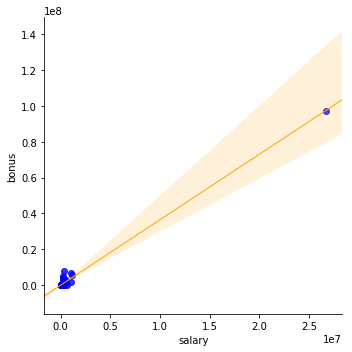

In [35]:
print "Analise de salario por bonus"
sns.lmplot("salary", "bonus", df[all_features_finacial_payments],
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

In [36]:
print "Empregados que possuem salarios acima de 1Mi e bonus 5Mi  respectivamente"
print
salay_gte1MI_or_bonus_gte5MI = df[(df['salary'] >= 1000000) | (df['bonus'] >= 5000000)]
salay_gte1MI_or_bonus_gte5MI

Empregados que possuem salarios acima de 1Mi e bonus 5Mi  respectivamente



,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,0.0,1110705.0,...,0.0,484.0,210698.0,108.0,True,0.0,-2334434.0,0.0,tim.belden@enron.com,228.0
FREVERT MARK A,1060932.0,3275.0,6426990.0,17252530.0,10433518.0,2000000.0,4188667.0,2979.0,0.0,14622185.0,...,2000000.0,21.0,7427621.0,6.0,False,0.0,-3367011.0,1617011.0,mark.frevert@enron.com,242.0
LAVORATO JOHN J,339288.0,7259.0,0.0,10425757.0,4158995.0,8000000.0,1008149.0,3962.0,0.0,5167144.0,...,0.0,2585.0,1552.0,411.0,False,0.0,0.0,2035380.0,john.lavorato@enron.com,528.0
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,0.0,49110078.0,...,81525000.0,36.0,10359729.0,16.0,True,0.0,-300000.0,3600000.0,kenneth.lay@enron.com,123.0
SKILLING JEFFREY K,1111258.0,3627.0,0.0,8682716.0,19250000.0,5600000.0,6843672.0,2042.0,0.0,26093672.0,...,0.0,108.0,22122.0,30.0,True,0.0,0.0,1920000.0,jeff.skilling@enron.com,88.0
TOTAL,26704229.0,0.0,32083396.0,309886585.0,311764000.0,97343619.0,130322299.0,0.0,-7576788.0,434509511.0,...,83925000.0,0.0,42667589.0,0.0,False,1398517.0,-27992891.0,48521928.0,0,0.0


In [37]:
print "A chave TOTAL é um sumarizador, portanto podera ser removido e é um outlier, pois nao se trata de um POI ou candidato a POI, os demais usuarios desta lista devera ser analisado pois podem ser candidatos a POI"
pois_candidates.update(['FREVERT MARK A','LAVORATO JOHN J'])
pois_candidates

A chave TOTAL é um sumarizador, portanto podera ser removido e é um outlier, pois nao se trata de um POI ou candidato a POI, os demais usuarios desta lista devera ser analisado pois podem ser candidatos a POI


{'FREVERT MARK A', 'LAVORATO JOHN J'}

In [38]:
pessoas_para_serem_removidas.add('TOTAL')
print "Pessoas a serem removidas "
pessoas_para_serem_removidas

Pessoas a serem removidas 


{'LOCKHART EUGENE E', 'THE TRAVEL AGENCY IN THE PARK', 'TOTAL'}

Analise de salario por bonus apos a remocao


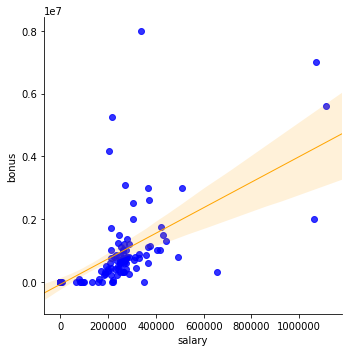

In [39]:
### Task 2: Remove outliers
df = remove_outliers_df(df, pessoas_para_serem_removidas)
print "Analise de salario por bonus apos a remocao"
sns.lmplot("salary", "bonus", df[all_features_finacial_payments],
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

Tukey's fences
Other methods flag observations based on measures such as the interquartile range. For example, if {\displaystyle Q_{1}} Q_{1} and {\displaystyle Q_{3}} Q_{3} are the lower and upper quartiles respectively, then one could define an outlier to be any observation outside the range:

Q1-k(Q3-Q1),Q3+k(Q3-Q1)

for some nonnegative constant {\displaystyle k} k. John Tukey proposed this test, where {\displaystyle k=1.5} k=1.5 indicates an "outlier", and {\displaystyle k=3} k=3 indicates data that is "far out".[15]

In [40]:
#{\big [}Q_{1}-k(Q_{3}-Q_{1}),Q_{3}+k(Q_{3}-Q_{1}){\big ]}

#Tukey's fences
#Other methods flag observations based on measures such as the interquartile range. For example, if {\displaystyle Q_{1}} Q_{1} and {\displaystyle Q_{3}} Q_{3} are the lower and upper quartiles respectively, then one could define an outlier to be any observation outside the range:

#Q1-k(Q3-Q1),Q3+k(Q3-Q1)
#for some nonnegative constant {\displaystyle k} k. John Tukey proposed this test, where {\displaystyle k=1.5} k=1.5 indicates an "outlier", and {\displaystyle k=3} k=3 indicates data that is "far out".[15]

Q1 = df.quantile(q=0.25)
Q3 = df.quantile(q=0.75)
k = 1.5

outliers = df[(df < (Q1-k*(Q3-Q1))) | (df > (Q3+k*(Q3-Q1)))].count(axis=1)
outliers.sort_values(axis=0, ascending=False, inplace=True)
outliers[outliers > 1]


LAY KENNETH L              15
FREVERT MARK A             13
BELDEN TIMOTHY N           11
WHALLEY LAWRENCE G          9
LAVORATO JOHN J             9
SKILLING JEFFREY K          9
BAXTER JOHN C               8
KEAN STEVEN J               8
HAEDICKE MARK E             8
ALLEN PHILLIP K             7
BUY RICHARD B               7
RICE KENNETH D              7
KITCHEN LOUISE              7
DELAINEY DAVID W            7
REDMOND BRIAN L             6
DERRICK JR. JAMES V         6
BHATNAGAR SANJAY            6
MARTIN AMANDA K             6
SHAPIRO RICHARD S           6
HANNON KEVIN P              6
BECK SALLY W                6
HORTON STANLEY C            5
PAI LOU L                   5
YEAGER F SCOTT              5
RIEKER PAULA H              5
COLWELL WESLEY              5
PIPER GREGORY F             5
CALGER CHRISTOPHER F        5
SHANKMAN JEFFREY A          4
DIMICHELE RICHARD G         4
                           ..
GRAY RODNEY                 2
GOLD JOSEPH                 2
GLISAN JR 

In [41]:
non_poi = df[df['poi'] == False]
salary_bonus_array = ['salary','bonus']


Q1 = non_poi[salary_bonus_array].quantile(q=0.25)
Q3 = non_poi[salary_bonus_array].quantile(q=0.75)
outliers = df[(df[salary_bonus_array] < (Q1-k*(Q3-Q1))) | (df[salary_bonus_array] > (Q3+k*(Q3-Q1)))].count(axis=1)
outliers.sort_values(axis=0, ascending=False, inplace=True)
df.loc[get_array_string_df(outliers[outliers > 0])]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
SKILLING JEFFREY K,1111258.0,3627.0,0.0,8682716.0,19250000.0,5600000.0,6843672.0,2042.0,0.0,26093672.0,...,0.0,108.0,22122.0,30.0,True,0.0,0.0,1920000.0,jeff.skilling@enron.com,88.0
FREVERT MARK A,1060932.0,3275.0,6426990.0,17252530.0,10433518.0,2000000.0,4188667.0,2979.0,0.0,14622185.0,...,2000000.0,21.0,7427621.0,6.0,False,0.0,-3367011.0,1617011.0,mark.frevert@enron.com,242.0
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,0.0,49110078.0,...,81525000.0,36.0,10359729.0,16.0,True,0.0,-300000.0,3600000.0,kenneth.lay@enron.com,123.0
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,...,0.0,2195.0,152.0,65.0,False,0.0,-3081055.0,304805.0,phillip.allen@enron.com,47.0
MCMAHON JEFFREY,370448.0,2355.0,0.0,4099771.0,1104054.0,2600000.0,558801.0,2228.0,0.0,1662855.0,...,0.0,48.0,297353.0,26.0,False,0.0,0.0,694862.0,jeffrey.mcmahon@enron.com,58.0
DELAINEY DAVID W,365163.0,3093.0,0.0,4747979.0,2291113.0,3000000.0,1323148.0,2097.0,0.0,3614261.0,...,0.0,3069.0,1661.0,609.0,True,0.0,0.0,1294981.0,david.delainey@enron.com,66.0
WHALLEY LAWRENCE G,510364.0,6019.0,0.0,4677574.0,3282960.0,3000000.0,2796177.0,3920.0,0.0,6079137.0,...,0.0,556.0,301026.0,24.0,False,0.0,0.0,808346.0,greg.whalley@enron.com,186.0
SHANKMAN JEFFREY A,304110.0,3221.0,0.0,3038702.0,1441898.0,2000000.0,630137.0,1730.0,0.0,2072035.0,...,0.0,2681.0,1191.0,83.0,False,0.0,0.0,554422.0,jeffrey.shankman@enron.com,94.0
FALLON JAMES B,304588.0,1755.0,0.0,3676340.0,940257.0,2500000.0,1392142.0,1604.0,0.0,2332399.0,...,0.0,75.0,401481.0,37.0,False,0.0,0.0,374347.0,jim.fallon@enron.com,42.0
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,0.0,1110705.0,...,0.0,484.0,210698.0,108.0,True,0.0,-2334434.0,0.0,tim.belden@enron.com,228.0


In [42]:
print "Não possui autlier com dados de salario e bonus"

Não possui autlier com dados de salario e bonus


In [43]:
df.shape

(143, 21)

### Otimização da Seleção de Características/Engenharia

In [44]:
### Task 3: Create new feature(s)
### Criação de novas características (relacionado com o mini-projeto: Lição 11)
df['agg_total_payment_stock_value'] = df['total_payments'] + df['total_stock_value']
df['agg_total_messages'] =  df['to_messages'] + df['from_messages'] + df['from_poi_to_this_person'] + df['from_this_person_to_poi']
df['agg_total_poi_correspondence'] =  df['from_poi_to_this_person'] + df['from_this_person_to_poi']

new_features = ['agg_total_payment_stock_value','agg_total_messages','agg_total_poi_correspondence']

my_dataset = pd.DataFrame.to_dict(df,orient='index')
my_feature_list = features_list[:]

In [45]:
### Criar duas variaveis locais labels e features para serem utilizadas para teste local
# Seleção de características feita de forma inteligente (relacionado com o mini-projeto: Lição 11)
my_feature_list = features_list[:]
labels,features = df[my_feature_list[0]],df[my_feature_list[1:]]  

from sklearn.feature_selection import SelectKBest

k = 10
k_best = SelectKBest(k=k)
k_best.fit(features, labels)
scores = k_best.scores_
unsorted_pairs = zip(my_feature_list[1:], scores)
sorted_pairs = list(reversed(sorted(unsorted_pairs, key=lambda x: x[1])))
k_best_features = dict(sorted_pairs[:k])

print "{0} melhores caracteristicas: {1} a serem utilizadas \n".format(k, k_best_features.keys())

sorted_pairs

10 melhores caracteristicas: ['salary', 'total_payments', 'loan_advances', 'bonus', 'total_stock_value', 'shared_receipt_with_poi', 'exercised_stock_options', 'deferred_income', 'restricted_stock', 'long_term_incentive'] a serem utilizadas 



[('total_stock_value', 22.510549090242055),
 ('exercised_stock_options', 22.348975407306217),
 ('bonus', 20.792252047181535),
 ('salary', 18.289684043404513),
 ('deferred_income', 11.424891485418364),
 ('long_term_incentive', 9.922186013189823),
 ('total_payments', 9.283873618427371),
 ('restricted_stock', 8.825442219916463),
 ('shared_receipt_with_poi', 8.589420731682381),
 ('loan_advances', 7.184055658288725),
 ('expenses', 5.418900189407036),
 ('from_poi_to_this_person', 5.243449713374958),
 ('other', 4.202436300271228),
 ('from_this_person_to_poi', 2.382612108227674),
 ('director_fees', 2.1314839924612046),
 ('to_messages', 1.6463411294420076),
 ('restricted_stock_deferred', 0.7681463447871311),
 ('deferral_payments', 0.22885961902145746),
 ('from_messages', 0.16970094762175533)]

In [46]:
print "Inserir na minha lista de features, as features levantadas pelo k best e as 3 novas features criadas"
my_feature_list_old = my_feature_list[:] 
my_feature_list = [target_label] + k_best_features.keys() + new_features
my_feature_list

Inserir na minha lista de features, as features levantadas pelo k best e as 3 novas features criadas


['poi',
 'salary',
 'total_payments',
 'loan_advances',
 'bonus',
 'total_stock_value',
 'shared_receipt_with_poi',
 'exercised_stock_options',
 'deferred_income',
 'restricted_stock',
 'long_term_incentive',
 'agg_total_payment_stock_value',
 'agg_total_messages',
 'agg_total_poi_correspondence']

In [47]:
# print features
print "{0} características selecionadas: {1}\n".format(len(my_feature_list) - 1, my_feature_list[1:])

### Criar duas variaveis locais labels e features para serem utilizadas para teste local
# Ajuste de escala das características feito corretamente
df2 = df.copy()
labels,features = df[my_feature_list[0]],df[my_feature_list[1:]] 

13 características selecionadas: ['salary', 'total_payments', 'loan_advances', 'bonus', 'total_stock_value', 'shared_receipt_with_poi', 'exercised_stock_options', 'deferred_income', 'restricted_stock', 'long_term_incentive', 'agg_total_payment_stock_value', 'agg_total_messages', 'agg_total_poi_correspondence']



In [48]:
# escalonamento de caracteristicas via min-max
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)
features

array([[0.18173547, 0.04330293, 0.        , ..., 0.04070209, 0.25993014,
        0.11927583],
       [0.        , 0.00176194, 0.        , ..., 0.00288389, 0.        ,
        0.        ],
       [0.00042924, 0.00884703, 0.        , ..., 0.04034643, 0.03163673,
        0.04153355],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00091131, 0.        ,
        0.        ],
       [0.14254386, 0.00347915, 0.        , ..., 0.08020612, 0.        ,
        0.        ],
       [0.        , 0.00053203, 0.        , ..., 0.00162347, 0.        ,
        0.        ]])

In [49]:
df2[my_feature_list[1:]] = features
my_dataset_old = my_dataset.copy()
my_dataset = pd.DataFrame.to_dict(df2,orient='index')
df2[my_feature_list]

,poi,salary,total_payments,loan_advances,bonus,total_stock_value,shared_receipt_with_poi,exercised_stock_options,deferred_income,restricted_stock,long_term_incentive,agg_total_payment_stock_value,agg_total_messages,agg_total_poi_correspondence
ALLEN PHILLIP K,False,0.181735,0.043303,0.0,0.521875,0.035218,0.254845,0.050353,0.120800,0.008537,0.059238,0.040702,0.259930,0.119276
BADUM JAMES P,False,0.000000,0.001762,0.0,0.000000,0.005250,0.000000,0.007506,1.000000,0.000000,0.000000,0.002884,0.000000,0.000000
BANNANTINE JAMES M,False,0.000429,0.008847,0.0,0.000000,0.106770,0.084224,0.117798,0.998544,0.119062,0.000000,0.040346,0.031637,0.041534
BAXTER JOHN C,False,0.240360,0.054407,0.0,0.150000,0.216315,0.000000,0.194494,0.604480,0.267091,0.308245,0.106489,0.000000,0.000000
BAY FRANKLIN R,False,0.215675,0.007992,0.0,0.050000,0.001283,0.000000,0.000000,0.942460,0.009877,0.000000,0.005834,0.000000,0.000000
BAZELIDES PHILIP J,False,0.072727,0.008306,0.0,0.000000,0.032573,0.000000,0.046571,1.000000,0.000000,0.018220,0.016112,0.000000,0.000000
BECK SALLY W,False,0.208169,0.009358,0.0,0.087500,0.002566,0.477993,0.000000,1.000000,0.008537,0.000000,0.007173,0.608184,0.564430
BELDEN TIMOTHY N,True,0.192574,0.053125,0.0,0.656250,0.022617,1.000000,0.027749,0.333854,0.010674,0.000000,0.043311,0.439671,0.357827
BELFER ROBERT,False,0.000000,0.000032,0.0,0.000000,0.000000,0.000000,0.000000,0.970751,0.002987,0.000000,0.000022,0.000000,0.000000
BERBERIAN DAVID,False,0.194898,0.002206,0.0,0.000000,0.050776,0.000000,0.047292,1.000000,0.058883,0.000000,0.017830,0.000000,0.000000


## Escolha e Afinamento de um Algorítmo

In [50]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, labels, test_size=0.5, random_state=42)

In [51]:
# parameter optimization (not currently used)
from sklearn.grid_search import GridSearchCV
import tester

H:\MBA\Python\Anaconda3\envs\py27-2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Naive Bayes Gaussian

In [52]:
### Naive Bayes Gaussian
from sklearn.naive_bayes import GaussianNB
nf_clf = GaussianNB()

tester.test_classifier(nf_clf, my_dataset_old, my_feature_list_old)

GaussianNB(priors=None)
	Accuracy: 0.76353	Precision: 0.24564	Recall: 0.37350	F1: 0.29637	F2: 0.33828
	Total predictions: 15000	True positives:  747	False positives: 2294	False negatives: 1253	True negatives: 10706



In [53]:
tester.test_classifier(nf_clf, my_dataset, my_feature_list)

GaussianNB(priors=None)
	Accuracy: 0.82973	Precision: 0.32964	Recall: 0.26800	F1: 0.29564	F2: 0.27841
	Total predictions: 15000	True positives:  536	False positives: 1090	False negatives: 1464	True negatives: 11910



In [54]:
my_dataset

{'ALLEN PHILLIP K': {'agg_total_messages': 0.2599301397205589,
  'agg_total_payment_stock_value': 0.04070209111527971,
  'agg_total_poi_correspondence': 0.11927582534611289,
  'bonus': 0.521875,
  'deferral_payments': 2869717.0,
  'deferred_income': 0.12080033420975878,
  'director_fees': 0.0,
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 0.05035290743226814,
  'expenses': 13868.0,
  'from_messages': 2195.0,
  'from_poi_to_this_person': 47.0,
  'from_this_person_to_poi': 65.0,
  'loan_advances': 0.0,
  'long_term_incentive': 0.05923795738124326,
  'other': 152.0,
  'poi': False,
  'restricted_stock': 0.0085374347957626,
  'restricted_stock_deferred': -126027.0,
  'salary': 0.18173547457026182,
  'shared_receipt_with_poi': 0.2548451367505887,
  'to_messages': 2902.0,
  'total_payments': 0.04330292548962511,
  'total_stock_value': 0.03521763903531165},
 'BADUM JAMES P': {'agg_total_messages': 0.0,
  'agg_total_payment_stock_value': 0.002883889251468615,
  'ag

In [55]:
print "Tunning"
print "Não Possui Tunning"

Tuning
Não Possui Tuning


### Decision Tree Classifier

In [56]:
### Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(min_samples_split=40)

tester.test_classifier(dt_clf, my_dataset_old, my_feature_list_old)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=40,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.84233	Precision: 0.24260	Recall: 0.08600	F1: 0.12698	F2: 0.09875
	Total predictions: 15000	True positives:  172	False positives:  537	False negatives: 1828	True negatives: 12463



In [57]:
tester.test_classifier(dt_clf, my_dataset, my_feature_list)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=40,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.84747	Precision: 0.26547	Recall: 0.08150	F1: 0.12471	F2: 0.09461
	Total predictions: 15000	True positives:  163	False positives:  451	False negatives: 1837	True negatives: 12549



In [58]:
print "Tunning"
print

parameters = {"criterion": ['gini', 'entropy'],
              "splitter":['best'],
              "min_samples_split" : [20,40],
              "max_depth" : [3,8]
              }

opt_model_dt_clf = GridSearchCV(dt_clf, param_grid=parameters, scoring='r2', cv=10)
tester.test_classifier(opt_model_dt_clf, my_dataset, my_feature_list)

Tuning

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=40,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [20, 40], 'splitter': ['best'], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)
	Accuracy: 0.84327	Precision: 0.29711	Recall: 0.12850	F1: 0.17941	F2: 0.14495
	Total predictions: 15000	True positives:  257	False positives:  608	False negatives: 1743	True negatives: 12392



### Decision Tree Regressor

In [59]:
### Decision Tree Regressor
from sklearn import tree
dtr_model = tree.DecisionTreeRegressor()

tester.test_classifier(dtr_model, my_dataset_old, my_feature_list_old)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
	Accuracy: 0.79847	Precision: 0.22922	Recall: 0.21650	F1: 0.22268	F2: 0.21893
	Total predictions: 15000	True positives:  433	False positives: 1456	False negatives: 1567	True negatives: 11544



In [60]:
tester.test_classifier(dtr_model, my_dataset, my_feature_list)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
	Accuracy: 0.79520	Precision: 0.23253	Recall: 0.23300	F1: 0.23277	F2: 0.23291
	Total predictions: 15000	True positives:  466	False positives: 1538	False negatives: 1534	True negatives: 11462



In [80]:
print "Tunning"
print

parameters = {"criterion": ['mse'],
              "splitter": ['best'],

              "max_depth" : range(5,10),
              "min_samples_split": [10,40],
              "min_samples_leaf": range(1,5),              
              "random_state": [20,40]
              
              }

opt_model_dtr_model = GridSearchCV(dtr_model, param_grid=parameters, scoring="r2",cv=10)

tester.test_classifier(opt_model_dtr_model, my_dataset, my_feature_list)

Tunning

All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for pr

All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed p

All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed p

All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed p

All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed p

All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed p

All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed p

All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed p

All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed p

All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed p

All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed p

All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed p

All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed p

All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed p

All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed p

All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed p

All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed predictions:
All predictions should take value 0 or 1.
Evaluating performance for processed p

In [ ]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html


In [ ]:
# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [ ]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.


In [ ]:
dump_classifier_and_data(clf, my_dataset, features_list)